In [1]:
# import relevant packages
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from models import Paths

world_map = gpd.read_file(Paths.WM / "world-administrative-boundaries.shp")
stats = pd.read_csv(Paths.CLEAN / "surface-temperatures.csv")

map_countries = world_map["name"]

# Rename countries in the stats dataset to match the map dataset

remappings = {
    "Afghanistan, Islamic Rep. of": "Afghanistan",
    "China, P.R.: Hong Kong": "Hong Kong",
    "Andorra, Principality of": "Andorra",
    "Bahrain, Kingdom of": "Bahrain",
    "Bahamas, The": "Bahamas",
    "Central African Rep.": "Central African Republic",
    "China, P.R.: Macao": "Macao",
    "China, P.R.: Mainland": "China",
    "Comoros, Union of the": "Comoros",
    "Netherlands, The": "Netherlands",
    "Eswatini, Kingdom of": "Eswatini",
    "Dominican Rep.": "Dominican Republic",
    "Egypt, Arab Rep. of": "Egypt",
    "Gambia, The": "Gambia",
    "Poland, Rep. of": "Poland",
    "Mauritania, Islamic Rep. of": "Mauritania",
    "Madagascar, Rep. of": "Madagascar",
    "Lesotho, Kingdom of": "Lesotho",
    "Mozambique, Rep. of": "Mozambique",
    "Lao People's Dem. Rep.": "Lao People's Democratic Republic",
    "Congo, Rep. of": "Congo",
    "Equatorial Guinea, Rep. of": "Equatorial Guinea",
    "Korea, Rep. of": "Republic of Korea",
    "Korea, Dem. People's Rep. of": "Democratic People's Republic of Korea",
    "Syrian Arab Rep.": "Syrian Arab Republic",
    "Taiwan Province of China": "Taiwan",
    "United Kingdom": "U.K. of Great Britain and Northern Ireland",
    "Antigua and Barbuda": "Antigua & Barbuda",
    "Iran, Islamic Rep. of": "Iran (Islamic Republic of)",
    "Fiji, Rep. of": "Fiji",
    "United States": "United States of America",
    "Congo, Dem. Rep. of the": "Democratic Republic of the Congo",
    "Tanzania, United Rep. of": "United Republic of Tanzania",
    "Cabo Verde": "Cape Verde",
    "Libya": "Libyan Arab Jamahiriya",
    "San Marino, Rep. of": "San Marino",
    "West Bank and Gaza": "West Bank",
    "Venezuela, Rep. Bolivariana de": "Venezuela",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Saint Pierre and Miquelon": "Saint Pierre & Miquelon",
    "St. Lucia": "Saint Lucia",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "São Tomé and Príncipe, Dem. Rep. of": "Sao Tome and Principe",

}

# Check what countries are in the stats dataset but not in the map dataset
# they are probably just named differently
stats["Country"] = stats["Country"].replace(remappings)
stats_countries = stats["Country"]

map_and_stats = world_map.merge(stats, left_on="name", right_on="Country", how="inner")

# print(world_map)


<Axes: >

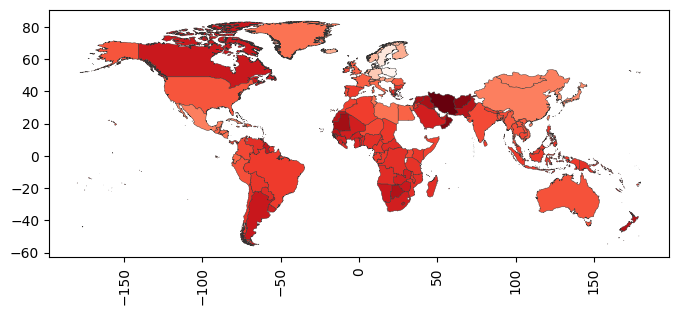

In [2]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)

bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
# cbar = fig.colorbar(bar_info)

map_and_stats.plot(column="1970", cmap="Reds", linewidth=0.3, ax=ax, edgecolor=".2")

# print(map_and_stats.columns)
